# INTRODUCTION

With the dataset of the Titanic's accident, I will try to find out if one person could survived depending on their travel profile

# IMPORT LIBRARIES

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
cf.go_offline()
%matplotlib inline

# IMPORT THE DATASET

In [2]:
train = pd.read_csv("titanic_train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# EXPLORATORY DATA ANALYSIS

In [3]:
sns.set_style("whitegrid")

With this count plot you can observed that most of people who died were man and from the group of people who survived, the most of those were women.

<AxesSubplot:xlabel='Survived', ylabel='count'>

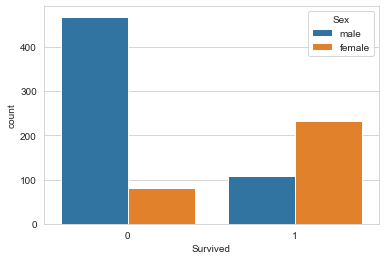

In [4]:
sns.countplot(x="Survived", data = train, hue = "Sex")

Next, we can see that most of people how died, were part of the cheapest ticket section.

<AxesSubplot:xlabel='Survived', ylabel='count'>

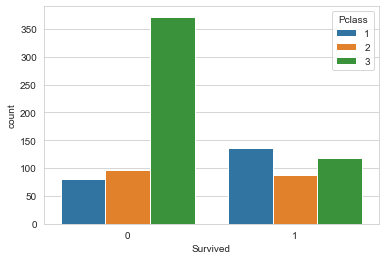

In [5]:
sns.countplot(x="Survived", data = train, hue = "Pclass")

With this histogram, we can analyze the most popular age range, the range goes from 20 to 35 years old.

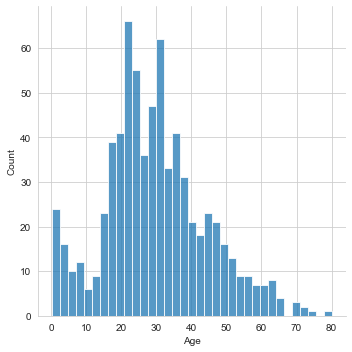

In [6]:
sns.displot(train["Age"].dropna(), kde=False, bins=35)

This next viz shows the most of people do not have neither siblings nor spouse.

<AxesSubplot:xlabel='SibSp', ylabel='count'>

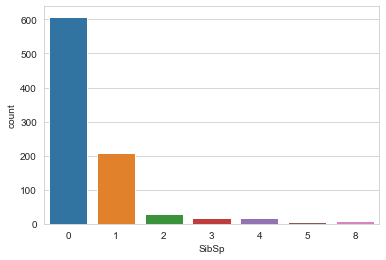

In [7]:
 sns.countplot(x="SibSp", data = train)

On this histogram graphic, we can observe the distribution on the ticker price. Most of them were the cheapest.

<AxesSubplot:>

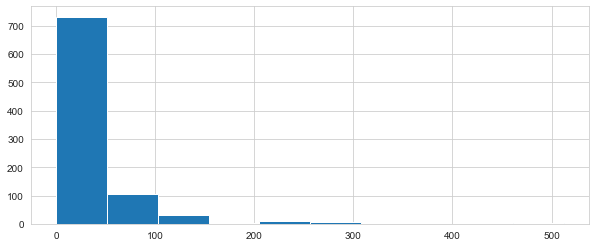

In [8]:
train["Fare"].hist(bins = 10, figsize=(10,4))

On this chart from cufflinks (just work online) is the same than the last one but with more details and able to make zoom.

In [9]:
train["Fare"].iplot(kind="hist", bins=30)

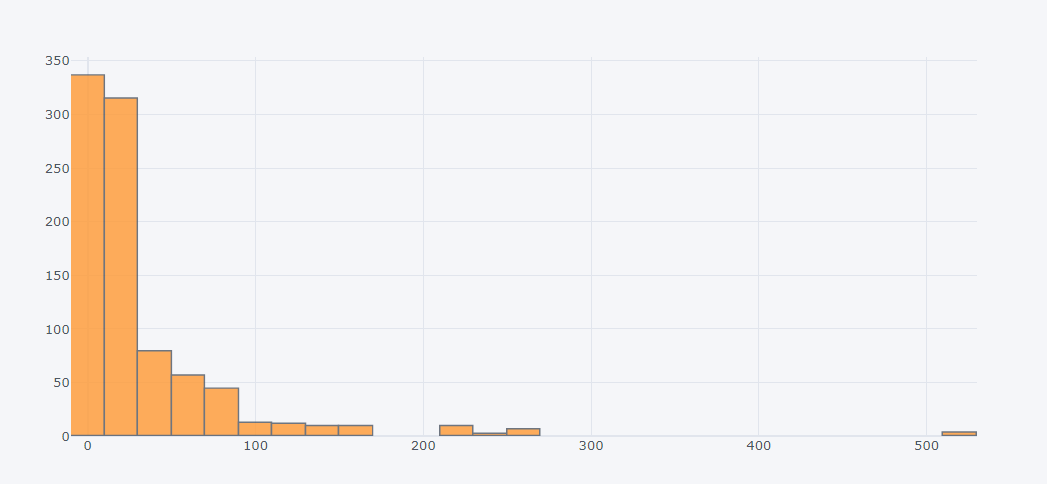

# DATA CLEANSING AND TRANSFORMATION

First I need to identify all N/A data

<AxesSubplot:>

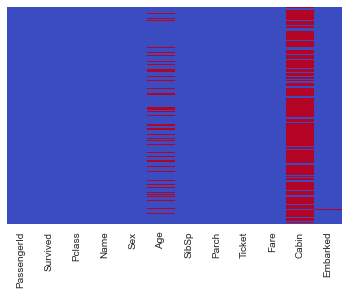

In [10]:
sns.heatmap(train.isnull(), yticklabels = False, cbar = False, cmap = "coolwarm")

I created a function that will let to declare a value into the "Age" variables who is N/A. Basically, the value will depend on the ticket class because the average is different on each one.

In [11]:
def Impute_Age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [12]:
train["Age"] = train[["Age", "Pclass"]].apply(Impute_Age, axis = 1)

Due to the large amount of N/A on the "Cabin" variable, it is better to cut it off.

In [13]:
train.drop("Cabin", axis = 1, inplace = True)

After those two actions, now we can see that our dataset does not have any N/A value.

<AxesSubplot:>

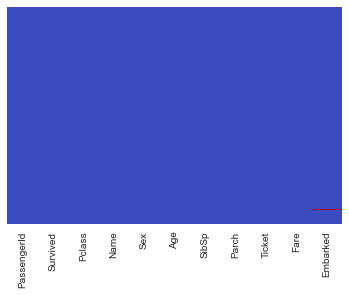

In [14]:
sns.heatmap(train.isnull(), yticklabels = False, cbar = False, cmap = "coolwarm")

# GET DUMMIES

We need to use this function because we have one variable (Age) that only have to options (male or female) but in a string data type, so we need to tranform it into numeric data type for the ML model can use it.

In [15]:
sex = pd.get_dummies(train["Sex"], drop_first=True)

In [16]:
embark = pd.get_dummies(train["Embarked"], drop_first=True)

In [17]:
train = pd.concat([train, sex, embark], axis = 1)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


Now we drop the columns that are not necessary any longer.

In [18]:
train.drop(["Sex", "Embarked", "Name", "Ticket", "PassengerId"], axis = 1, inplace = True)

In [19]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [33]:
train.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q',
       'S'],
      dtype='object')

# MACHINE LEARNING SECTION

First I separate the dataset into four sections to creater the function for our ML model

In [47]:
X = train[['Pclass','Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q',
       'S']]
y = train["Survived"]

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 101) 

Then, I created the object for training it and then making some predictions

In [49]:
from sklearn.linear_model import LogisticRegression
logmodel =  LogisticRegression(solver='lbfgs', max_iter=1000)

In [50]:
logmodel.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [51]:
pre = logmodel.predict(X_test)

Finally we need to check the performance of the fuction of our ML model.

In [52]:
from sklearn.metrics import classification_report, confusion_matrix

In [53]:
print("Classification Report: ")
print(classification_report(y_test, pre))
print("*******************************")
print("Confusion Matrix: ")
print(confusion_matrix(y_test, pre))

Classification Report: 
              precision    recall  f1-score   support

           0       0.78      0.87      0.82       154
           1       0.79      0.67      0.72       114

    accuracy                           0.78       268
   macro avg       0.79      0.77      0.77       268
weighted avg       0.78      0.78      0.78       268

*******************************
Confusion Matrix: 
[[134  20]
 [ 38  76]]
